In [136]:
import sage_data_client
import matplotlib.pyplot as plt
import pandas as pd
from metpy.calc import dewpoint_from_relative_humidity, wet_bulb_temperature
from metpy.units import units
from PIL import Image
import numpy as np
import datetime

from matplotlib.dates import DateFormatter

In [137]:
hours = 48
end = datetime.datetime.utcnow().strftime('%Y-%m-%dT%H:%M:%SZ')
start = (datetime.datetime.utcnow() -  \
                        datetime.timedelta(hours=hours)).strftime('%Y-%m-%dT%H:%M:%SZ')

#start = "2023-05-05T18:00:00Z"
#end = "2023-05-06T12:00:00Z"


In [138]:
# Query the SAGE data client to access the data; use 'name' filter
#this takes a LONG time when doing more than a day

df_temp = sage_data_client.query(start=start,
                                 end=end, 
                                    filter={
                                        "name" : 'wxt.env.temp|wxt.env.humidity|wxt.env.pressure|wxt.rain.accumulation',
                                        "plugin" : "registry.sagecontinuum.org/jrobrien/waggle-wxt536:0.23.5.*",
                                        "vsn" : "W08E",
                                        "sensor" : "vaisala-wxt536"
                                    }
)

In [139]:
df_temp

,timestamp,name,value,meta.host,meta.missing,meta.node,meta.plugin,meta.sensor,meta.task,meta.units,meta.vsn,meta.zone
0,2023-05-19 17:10:08.234231813+00:00,wxt.env.humidity,67.6,000048b02d35a87e.ws-nxcore,-9999.9,000048b02d35a87e,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,percent,W08E,core
1,2023-05-19 17:10:08.310015835+00:00,wxt.env.humidity,67.6,000048b02d35a87e.ws-nxcore,-9999.9,000048b02d35a87e,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,percent,W08E,core
2,2023-05-19 17:10:08.384376539+00:00,wxt.env.humidity,67.6,000048b02d35a87e.ws-nxcore,-9999.9,000048b02d35a87e,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,percent,W08E,core
3,2023-05-19 17:10:08.458119921+00:00,wxt.env.humidity,67.6,000048b02d35a87e.ws-nxcore,-9999.9,000048b02d35a87e,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,percent,W08E,core
4,2023-05-19 17:10:08.532305326+00:00,wxt.env.humidity,67.6,000048b02d35a87e.ws-nxcore,-9999.9,000048b02d35a87e,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,percent,W08E,core
...,...,...,...,...,...,...,...,...,...,...,...,...
1897943,2023-05-20 20:57:33.719333959+00:00,wxt.rain.accumulation,0.0,000048b02d35a87e.ws-nxcore,-9999.9,000048b02d35a87e,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,milimeters,W08E,core
1897944,2023-05-20 20:57:33.797232010+00:00,wxt.rain.accumulation,0.0,000048b02d35a87e.ws-nxcore,-9999.9,000048b02d35a87e,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,milimeters,W08E,core
1897945,2023-05-20 20:57:33.873665354+00:00,wxt.rain.accumulation,0.0,000048b02d35a87e.ws-nxcore,-9999.9,000048b02d35a87e,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,milimeters,W08E,core
1897946,2023-05-20 20:57:33.950048616+00:00,wxt.rain.accumulation,0.0,000048b02d35a87e.ws-nxcore,-9999.9,000048b02d35a87e,registry.sagecontinuum.org/jrobrien/waggle-wxt...,vaisala-wxt536,waggle-wxt536,milimeters,W08E,core


In [140]:
# Query the SAGE data client to access the data; use 'name' filter
#this takes a LONG time when doing more than a day

winds = sage_data_client.query(start=start,
                                 end=end, 
                                    filter={
                                        "name" : 'wxt.wind.speed|wxt.wind.direction',
                                        "plugin" : "registry.sagecontinuum.org/jrobrien/waggle-wxt536:0.23.5.*",
                                        "vsn" : "W08D",
                                        "sensor" : "vaisala-wxt536"
                                    }
)


In [141]:
hums = df_temp[df_temp['name']=='wxt.env.humidity']
temps = df_temp[df_temp['name']=='wxt.env.temp']
pres = df_temp[df_temp['name']=='wxt.env.pressure']
rain = df_temp[df_temp['name']=='wxt.rain.accumulation']


npres = len(pres)
nhum = len(hums)
ntemps = len(temps)
nrains = len(rain)
print(npres, nhum, ntemps, nrains)
minsamps = min([nhum, ntemps, npres, nrains])

vals = temps.set_index('timestamp')[0:minsamps]
vals['temperatures'] = vals.value.to_numpy()[0:minsamps]
vals['humidity'] = hums.value.to_numpy()[0:minsamps]
vals['pressure'] = pres.value.to_numpy()[0:minsamps]
vals['rainfall'] = rain.value.to_numpy()[0:minsamps]



474487 474487 474487 474487


In [142]:
direction = winds[winds['name']=='wxt.wind.direction']
speed = winds[winds['name']=='wxt.wind.speed']

nspeed = len(speed)
ndir = len(direction)
print(nspeed, ndir)
minsamps = min([nspeed, ndir])

windy = speed.set_index('timestamp')[0:minsamps]
windy['speed'] = windy.value.to_numpy()[0:minsamps]
windy['direction'] = direction.value.to_numpy()[0:minsamps]


winds10mean = windy.resample('60S').mean(numeric_only=True).ffill()
winds10max = windy.resample('60S').max(numeric_only=True).ffill()

2083447 2083447


In [143]:
dp = dewpoint_from_relative_humidity( vals.temperatures.to_numpy() * units.degC, 
                                     vals.humidity.to_numpy() * units.percent)

vals['dewpoint'] = dp

In [144]:
#vals10 = vals.fillna('nearest').resample('10S').mean(numeric_only=True)
vals10 = vals.resample('10S').mean(numeric_only=True).ffill() #ffil gets rid of nans due to empty resample periods

#vals10['pydatetime'] = vals10.index.to_pydatetime()
#vals10 = vals10.set_index('pydatetime')

In [145]:
vals10

,value,temperatures,humidity,pressure,rainfall,dewpoint
timestamp,,,,,,
2023-05-19 17:10:00+00:00,20.6,20.6,67.600000,987.800000,0.0,14.401487
2023-05-19 17:10:10+00:00,20.6,20.6,67.600000,987.800000,0.0,14.401487
2023-05-19 17:10:20+00:00,20.6,20.6,67.600000,987.800000,0.0,14.401487
2023-05-19 17:10:30+00:00,20.6,20.6,67.615385,987.815385,0.0,14.405003
2023-05-19 17:10:40+00:00,20.6,20.6,67.700000,987.900000,0.0,14.424340
...,...,...,...,...,...,...
2023-05-20 20:56:50+00:00,20.7,20.7,34.300000,994.300000,0.0,4.411263
2023-05-20 20:57:00+00:00,20.7,20.7,34.320000,994.270000,0.0,4.419581
2023-05-20 20:57:10+00:00,20.7,20.7,34.400000,994.100000,0.0,4.452854


In [146]:
wb = wet_bulb_temperature(vals10.pressure.to_numpy() * units.hPa,
                          vals10.temperatures.to_numpy() * units.degC,
                          vals10.dewpoint.to_numpy() * units.degC)

vals10['wetbulb'] = wb

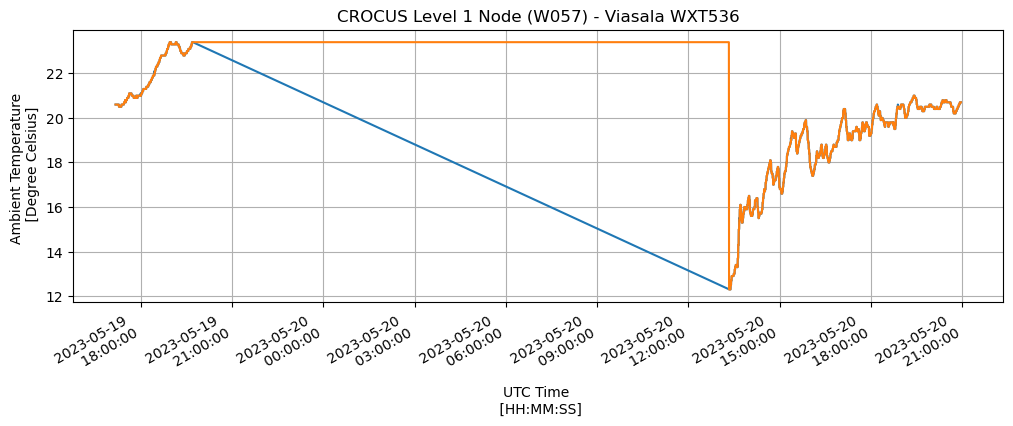

In [147]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M:%S")

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
vals.temperatures.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Viasala WXT536',
                                          ax=axs
                                          )

vals10.temperatures.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Viasala WXT536',
                                          ax=axs
                                          )


axs.xaxis.set_major_formatter(date_form)
axs.grid(True)

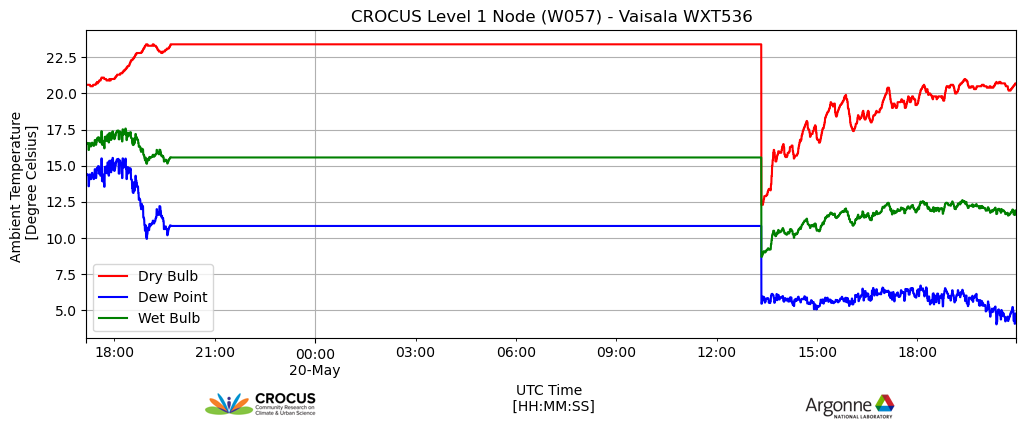

In [148]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M")

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
vals10.temperatures.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Vaisala WXT536',
                                          ax=axs, color='r', label='Dry Bulb'
                                          )


# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
vals10.dewpoint.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Vaisala WXT536',
                                          ax=axs, color='b', label='Dew Point'
                                          )


vals10.wetbulb.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Level 1 Node (W057) - Vaisala WXT536',
                                          ax=axs, color='g', label='Wet Bulb'
                                          )


#axs.xaxis.set_major_formatter(date_form)

im = Image.open('Argonnelablogo.PNG')

im.thumbnail([im.size[0]/12, im.size[1]/12])
height = im.size[1]
width = im.size[0]
fig.figimage(im, 800  , 0)

im2 = Image.open('cr.png')

im2.thumbnail([im2.size[0]/4, im2.size[1]/4])
height = im2.size[1]
width = im2.size[0]
fig.figimage(im2, 200  , -20, zorder=-1)
#axs.xaxis.set_major_formatter(date_form)

plt.legend()
axs.grid(True)

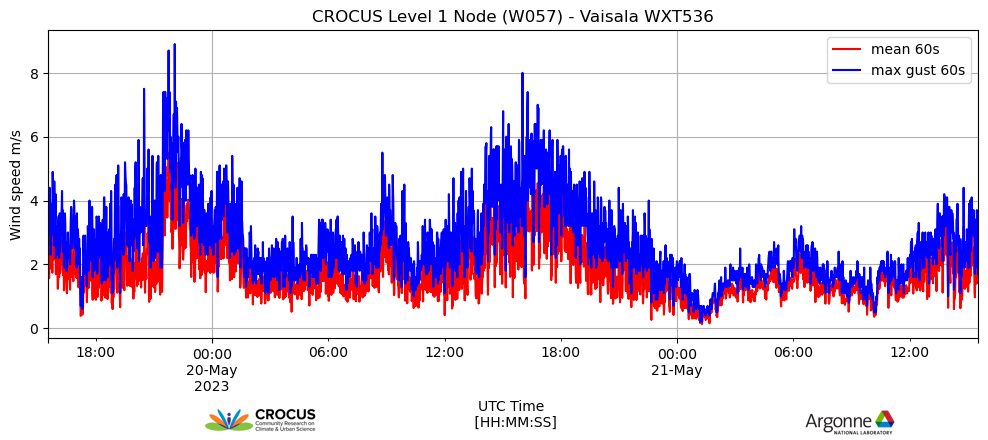

In [149]:
fig, axs = plt.subplots(figsize=(12, 4))

# Define Format of how the date is displayed
date_form = DateFormatter("%Y-%m-%d \n %H:%M")

# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
winds10mean.speed.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Wind speed m/s',
                                          title='CROCUS Level 1 Node (W057) - Vaisala WXT536',
                                          ax=axs, color='r', label='mean 60s'
                                          )


# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
winds10max.speed.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Wind speed m/s',
                                          title='CROCUS Level 1 Node (W057) - Vaisala WXT536',
                                          ax=axs, color='b', label='max gust 60s'
                                          )



#axs.xaxis.set_major_formatter(date_form)

im = Image.open('Argonnelablogo.PNG')

im.thumbnail([im.size[0]/12, im.size[1]/12])
height = im.size[1]
width = im.size[0]
fig.figimage(im, 800  , 0)

im2 = Image.open('cr.png')

im2.thumbnail([im2.size[0]/4, im2.size[1]/4])
height = im2.size[1]
width = im2.size[0]
fig.figimage(im2, 200  , -20, zorder=-1)
#axs.xaxis.set_major_formatter(date_form)

plt.legend()
axs.grid(True)

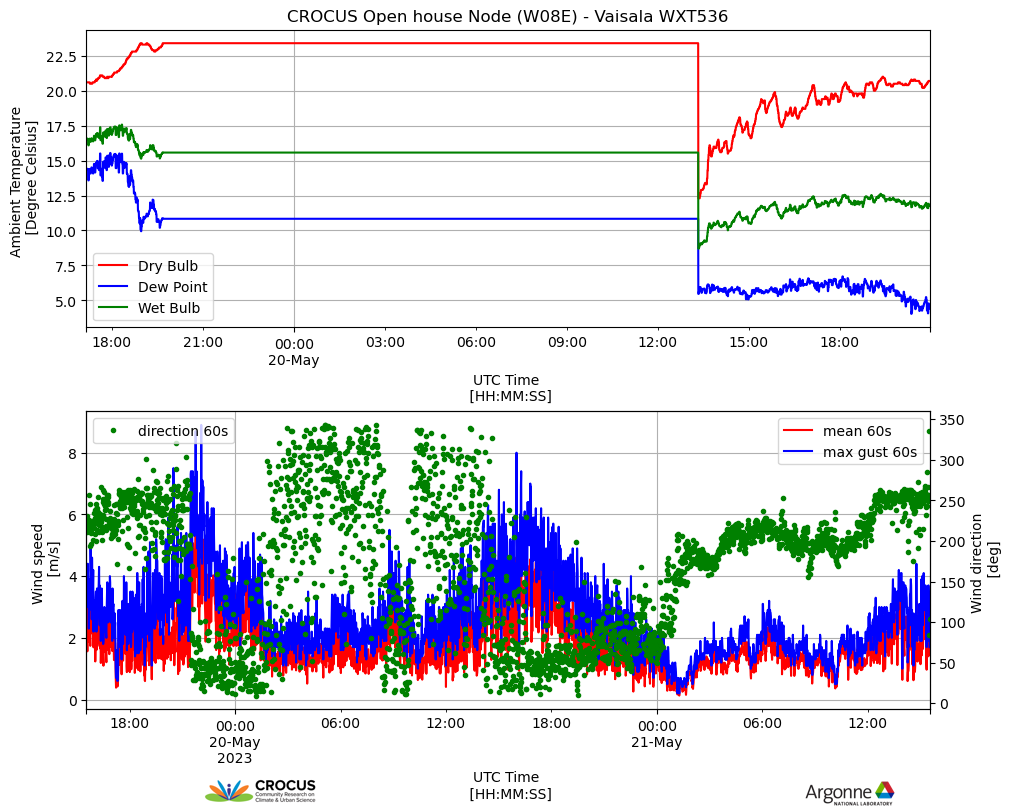

In [150]:
fig, axs = plt.subplots( ncols=1, nrows=2, figsize=[10,8], constrained_layout=True)
vals10.temperatures.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Open house Node (W08E) - Vaisala WXT536',
                                          ax=axs[0], color='r', label='Dry Bulb',
                                          )


# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
vals10.dewpoint.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Open house Node (W08E) - Vaisala WXT536',
                                           color='b', label='Dew Point',
                                          ax=axs[0])


vals10.wetbulb.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Ambient Temperature \n [Degree Celsius]',
                                          title='CROCUS Open house Node (W08E) - Vaisala WXT536',
                                          color='g', label='Wet Bulb',
                                          ax=axs[0])

axs[0].legend()
axs[0].grid(True)

winds10mean.speed.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Wind speed m/s',
                                          title='',
                                          ax=axs[1], color='r', label='mean 60s'
                                          )


# Note: Use the Pandas DataFrame 'loc' functionality to search the object for the ambient temp
winds10max.speed.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Wind speed \n [m/s]',
                                          title='',
                                          ax=axs[1], color='b', label='max gust 60s'
                                          )
axs[1].legend()
axs[1].grid(True)

ytwin = plt.twinx()

winds10mean.direction.plot(xlabel='UTC Time \n [HH:MM:SS]',
                                          ylabel='Wind direction \n [deg]',
                                          title='',
                                          ax=ytwin, color='g', label='direction 60s',
                                          marker='.', linestyle='none')

ytwin.legend(loc=2)

im = Image.open('Argonnelablogo.PNG')

im.thumbnail([im.size[0]/12, im.size[1]/12])
height = im.size[1]
width = im.size[0]
fig.figimage(im, 800  , 0)

im2 = Image.open('cr.png')

im2.thumbnail([im2.size[0]/4, im2.size[1]/4])
height = im2.size[1]
width = im2.size[0]
fig.figimage(im2, 200  , -20, zorder=-1)
#axs.xaxis.set_major_formatter(date_form)
